Task 1: The fast algorithm

A circular worldline for a particle can be written as

$\vec{x(t)} = R(cos(\frac{2pit}{T}),sin(\frac{2pit}{T}))=  R(cos(wt),sin(wt))$

where $w=\frac{2pi}{T}$

Letting $x=Rcos(wt)$  and  $y=Rsin(wt)$

$\Rightarrow \vec{x(t)}=(x,y)$

Deriving with respect to t

$\vec{v(t)}=(-\frac{2pi}{T}y, \frac{2pi}{T}x)$

We can rewrite it as

$ \begin{align}
     \begin{bmatrix}
          \dot{x} \\
           \dot{y} \\
                   \end{bmatrix} &=  \begin{bmatrix}
          0 && -\frac{2pi}{T} \\
           \frac{2pi}{T}  &&  0\\
                   \end{bmatrix}  \begin{bmatrix}
          x \\
          y \\
                   \end{bmatrix} 
  \end{align}$

Using the backward Euler method of integration, we can convert this to a linear system of equations

$ \begin{align}
       \begin{bmatrix}
          1 && \frac{2pi\Delta t}{T} \\
           -\frac{2pi \Delta t}{T}  &&  1\\
                   \end{bmatrix}  \begin{bmatrix}
          x(t + \Delta t) \\
          y(t + \Delta t) \\
                   \end{bmatrix}  &= \begin{bmatrix}
          x(t) \\
           y(t) \\
                   \end{bmatrix}
  \end{align}$  $\cdot \cdot \cdot (1)$

A linear system problem (LSP) can be represented as the following

$A\vec{x} = \vec{b} $

where A is an $N_b × N_b$ Hermitian matrix and $\vec{x}$ and $\vec{b}$ are $N_b$-dimensional vectors. For simplicity, it is assumed $N_b = 2^{n_b}$. Otherwise, dummy equations can be added to convert the system satisfy this assumption. A and $\vec{b}$ are known and $\vec{x}$ is the unknown to be solved, i.e.

$\vec{x} =A^{-1}\vec{b} $


Morrell Jr, H. J., & Wong, H. Y. (2021). Step-by-Step HHL Algorithm Walkthrough to Enhance the Understanding of Critical Quantum Computing Concepts. arXiv preprint arXiv:2108.09004.

if A is not Hermitian, then we can define $ \begin{align}
       \tilde{A}=\begin{bmatrix}
          0 && A \\
           A^\dagger  &&  0\\
                   \end{bmatrix}  \end{align}$.
                   
As $\tilde{A}$ is Hermitian, we can solve the equation
$ \begin{align}
         \tilde{A} y= \begin{bmatrix}
       \vec{b}    \\
           0 \\
                   \end{bmatrix}
  \end{align}$ to get $ \begin{align}
         y= \begin{bmatrix}
          0\\
            \vec{x}  \\
                   \end{bmatrix}
  \end{align}$
  
  
  Harrow, A. W., Hassidim, A., & Lloyd, S. (2009). Quantum algorithm for linear systems of equations. Physical review letters, 103(15), 150502.

As Matrix $ \begin{align}
       \begin{bmatrix}
          1 && \frac{2pi\Delta t}{T} \\
           -\frac{2pi \Delta t}{T}  &&  1\\
                   \end{bmatrix}    \end{align}$ 
 in equation (1) is Skew-Hermitian we define 

$ \begin{align}
       \begin{bmatrix}
          0 && 0 && 1 && \frac{2pi\Delta t}{T} \\
          0 && 0 && -\frac{2pi\Delta t}{T} && 1 \\
           1 &&  -\frac{2pi\Delta t}{T} && 0 &&0 \\
          \frac{2pi\Delta t}{T} && 1 && 0 &&0 \\
                             \end{bmatrix}  
  \end{align}$ 
  which is now a Hermitian Matrix.
  For now we take the normalized problem where R=1 and $t_0=0$, so we have $ \begin{align}
      \begin{bmatrix}
       \vec{b}    \\
           0 \\
                   \end{bmatrix} = \begin{bmatrix}
          x(t_0)\\
            y(t_0)  \\ 0 \\ 0 \\
                   \end{bmatrix} = \begin{bmatrix}
          1\\
            0  \\ 0 \\ 0 \\
                   \end{bmatrix}
  \end{align}$
  


The following code has been taken from https://qiskit.org/textbook/ch-applications/hhl_tutorial.html and modified to solve our problem

The interface for all algorithms to solve the linear system problem is `LinearSolver`. The problem to be solved is only specified when the `solve()` method is called:
```python
LinearSolver(...).solve(matrix, vector)
```

The simplest implementation takes the matrix and the vector as NumPy arrays. Below we also create a `NumPyLinearSolver` (the classical algorithm) to validate our solutions.

In [1]:
import numpy as np
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
from qiskit.algorithms.linear_solvers.hhl import HHL
T = 6
dt = 0.1
matrix = np.array([[0,0,1, (2*np.pi*dt)/T], [0,0,-(2*np.pi*dt)/T,1],[1,-(2*np.pi*dt)/T,0,0],[(2*np.pi*dt)/T,1,0,0] ])
vector = np.array([1, 0, 0, 0])
naive_hhl_solution = HHL().solve(matrix, vector)
print("Hermitian Matrix for T=",T,"and delta t=",dt)
print(matrix)
print()
print("Initial position vector (b vector) at t=0")
print(vector)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Hermitian Matrix for T= 6 and delta t= 0.1
[[ 0.          0.          1.          0.10471976]
 [ 0.          0.         -0.10471976  1.        ]
 [ 1.         -0.10471976  0.          0.        ]
 [ 0.10471976  1.          0.          0.        ]]

Initial position vector (b vector) at t=0
[1 0 0 0]


For the classical solver we need to rescale the right hand side (i.e. `vector / np.linalg.norm(vector)`) to take into account the renormalisation that occurs once `vector` is encoded in a quantum state within HHL.

When np.linalg.norm() is called on an array-like input without any additional arguments, the default behavior is to compute the L2 norm on a flattened view of the array. This is the square root of the sum of squared elements and can be interpreted as the length of the vector in Euclidean space.

If you wanted the vector have a unit norm, you would simply divide every element by the norm.



In [2]:
classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))

Recall that the HHL algorithm can find a solution exponentially faster in the size of the system than their classical counterparts (i.e. logarithmic complexity instead of polynomial). However the cost for this exponential speedup is that we do not obtain the full solution vector.
Instead, we obtain a quantum state representing the vector $x$ and learning all the components of this vector would take a linear time in its dimension, diminishing any speedup obtained by the quantum algorithm.

Therefore, we can only compute functions from $x$ (the so called observables) to learn information about the solution.
This is reflected in the `LinearSolverResult` object returned by `solve()`, which contains the following properties
- `state`: either the circuit that prepares the solution or the solution as a vector
- `euclidean_norm`: the euclidean norm if the algorithm knows how to calculate it 
- `observable`: the (list of) calculated observable(s)
- `circuit_results`: the observable results from the (list of) circuit(s)

Let's ignore `observable` and `circuit_results` for the time being and check the solutions we obtained before.

First, `classical_solution` was the result from a classical algorithm, so if we call `.state` it will return an array:

In [3]:
print('classical state:', classical_solution.state)

classical state: [0.         0.         0.98915273 0.10358383]


Our other two examples were quantum algorithms, hence we can only access to the quantum state. This is achieved by returning the quantum circuit that prepares the solution state:

In [4]:
print('naive state:')
print(naive_hhl_solution.state)

naive state:
      ┌─────────────┐┌──────┐        ┌─────────┐
q4_0: ┤0            ├┤4     ├────────┤4        ├
      │  circuit-85 ││      │        │         │
q4_1: ┤1            ├┤5     ├────────┤5        ├
      └─────────────┘│      │┌──────┐│         │
q5_0: ───────────────┤0     ├┤3     ├┤0        ├
                     │  QPE ││      ││  QPE_dg │
q5_1: ───────────────┤1     ├┤2     ├┤1        ├
                     │      ││      ││         │
q5_2: ───────────────┤2     ├┤1 1/x ├┤2        ├
                     │      ││      ││         │
q5_3: ───────────────┤3     ├┤0     ├┤3        ├
                     └──────┘│      │└─────────┘
  q6: ───────────────────────┤4     ├───────────
                             └──────┘           


Recall that the Euclidean norm for a vector $\mathbf{x}=(x_1,\dots,x_N)$ is defined as $||\mathbf{x}||=\sqrt{\sum_{i=1}^N x_i^2}$. Therefore, the probability of measuring $1$ in the auxiliary qubit from Step  is the squared norm of $\mathbf{x}$. This means that the HHL algorithm can always calculate the euclidean norm of the solution and we can compare the accuracy of the results:

In [5]:
print('classical Euclidean norm:', classical_solution.euclidean_norm)
print('naive Euclidean norm:', naive_hhl_solution.euclidean_norm)

classical Euclidean norm: 0.9945615750429233
naive Euclidean norm: 0.9945615750429039


Comparing the solution vectors componentwise is more tricky, reflecting again the idea that we cannot obtain the full solution vector from the quantum algorithm. However, for educational purposes we can check that indeed the different solution vectors obtained are a good approximation at the vector component level as well. 

To do so first we need to use `Statevector` from the `quantum_info` package and extract the right vector components, i.e. those corresponding to the ancillary qubit (bottom in the circuits) being $1$ and the work qubits (the two middle in the circuits) being $0$. Thus, we are interested in the states `1000` and `1001`, corresponding to the first and second components of the solution vector respectively.

Following the results from Cao, Y., Daskin, A., Frankel, S., & Kais, S. (2012). Quantum circuit design for solving linear systems of equations. Molecular Physics, 110(15-16), 1675-1680.
For the final state of the algorithm for solving the 4 × 4 system, we have to choose the correct decimal value that corresponds to the basis state of the seven-qubit system.

Basis State |i > = |Anc. >|Reg.C >|Reg.b >

In [6]:
from qiskit.quantum_info import Statevector

naive_sv = Statevector(naive_hhl_solution.state).data
#tridi_sv = Statevector(tridi_solution.state).data

# Extract the right vector components. |1000000> corresponds to the index 64, |1000001> corresponds to the index 65,|1000010> corresponds to the index 66 and |1000011> corresponds to the index 67
naive_full_vector = np.array([ naive_sv[64], naive_sv[65], naive_sv[66], naive_sv[67]])

print('naive raw solution vector:', naive_full_vector)





naive raw solution vector: [9.01578195e-16-4.97636903e-15j 4.66014248e-15-3.70421887e-16j
 9.94561575e-01-1.57365885e-14j 1.04150245e-01-1.43101505e-14j]


At a first glance it might seem that this is wrong because the components are complex numbers instead of reals. However note that the imaginary part is very small, most likely due to computer accuracy, and can be disregarded in this case.

In [7]:
naive_full_vector = np.real(naive_full_vector)

Next, we will divide the vectors by their respective norms to suppress any constants coming from the different parts of the circuits. The full solution vector can then be recovered by multiplying these normalised vectors by the respective Euclidean norms calculated above:

In [8]:
print('full naive solution vector:', naive_hhl_solution.euclidean_norm*naive_full_vector/np.linalg.norm(naive_full_vector))
#print('full tridi solution vector:', tridi_solution.euclidean_norm*tridi_full_vector/np.linalg.norm(tridi_full_vector))
print('classical state:', classical_solution.state)

full naive solution vector: [8.96675029e-16 4.63479864e-15 9.89152727e-01 1.03583831e-01]
classical state: [0.         0.         0.98915273 0.10358383]


Remembering that for this problem we seek to find $ \begin{align}
         y= \begin{bmatrix}
          0\\
            \vec{x}  \\
                   \end{bmatrix}
  \end{align}$, we just consider the components of $\vec{x}$ 
  
We are interested in the third and fourth components of the solution vector, which correspond to the components of $\vec{x}$. Thus, we are interested in the states |1000010>  corresponding to the third component of the solution vector and  |1000011>  corresponding to the fourth component of the solution vector. |1000010> corresponds to the index 66 and |1000011> corresponds to the index 67
  

In [9]:
naive_partial_vector = np.array([ 0, 0, naive_sv[66], naive_sv[67]])
naive_partial_vector = np.real(naive_partial_vector)  #Real part of naive_partial_vector

In [10]:
print('full naive solution vector:', "y=[",0,"        ",0,"        ",naive_hhl_solution.euclidean_norm*naive_partial_vector[2]/np.linalg.norm(naive_partial_vector),naive_hhl_solution.euclidean_norm* naive_partial_vector[3]/np.linalg.norm(naive_partial_vector),"]") #print full naive solution vector
print('from classical state:', "y=",classical_solution.state)

full naive solution vector: y=[ 0          0          0.989152726551841 0.10358383130045241 ]
from classical state: y= [0.         0.         0.98915273 0.10358383]


Calculate the circuit depth

In [11]:
from qiskit import transpile
naive_depths = []
naive_hhl_solution = HHL().solve(matrix, vector)
naive_qc = transpile(naive_hhl_solution.state,basis_gates=['id', 'rz', 'sx', 'x', 'cx'])
naive_depths.append(naive_qc.depth())
   

In [12]:
nb=2
sizes = [str(2**nb)+"x"+str(2**nb)]
columns = ['size of the system', 'quantum_solution depth']
data = np.array([sizes, naive_depths])
#print(columns[0],data[0])
#print(columns[1],data[1])
row_format ="{:>23}" * (len(columns) )
for team, row in zip(columns, data):
    print(row_format.format(team, *row))

     size of the system                    4x4
 quantum_solution depth                   2623


Now we will perform the loop operation to obtain data for simulating the orbit of the James Webb telescope using the implicit Euler method of integration and the HHL algorithm.

In [13]:
#Code to simulate the orbit of the James Webb telescope
xv1=[1] #initial position for quantum algorithm
yv1=[0]
cxv1 = [1] #initial position for classic algorithm
cyv1 = [0]
t1 = [] #list to keep track of time 
vector = np.array([1, 0, 0, 0])  #vector b representing initial position at time t=0
vector = vector/np.linalg.norm(vector)  #normaized vector b representing initial position at time t=0
for i in range(181):
    T = 180  #180 days= 6 months (30 days per month)
    dt = 1  #every day we measure
    print('On day',i,'the results are') #print day of measurment
    print('normalized vector imput', vector)  #print normalized imput vector
    print('square of the norm of vector imput',np.linalg.norm(vector)**2) #print square of the norm of vector imput(sum of squared components) to cheek if it is a valid quantum state
    matrix = np.array([[0,0,1, (2*np.pi*dt)/T], [0,0,-(2*np.pi*dt)/T,1],[1,-(2*np.pi*dt)/T,0,0],[(2*np.pi*dt)/T,1,0,0] ])  #Hermitian Matrix
    naive_hhl_solution = HHL().solve(matrix, vector)  #naive_hhl_solution from HHL algorithm
    classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector)) #classical_solution from classical solution algorithm
    naive_sv = Statevector(naive_hhl_solution.state).data #state vector of quantum solution
    #Extract the right vector components, i.e. those corresponding to the ancillary qubit (bottom in the circuits) being 1 and the work qubits (the four middle in the circuits) being 0, 
    #Extract the right vector components. |1000000> corresponds to the index 64, |1000001> corresponds to the index 65,|1000010> corresponds to the index 66 and |1000011> corresponds to the index 67
    naive_full_vector = np.array([ naive_sv[64], naive_sv[65], naive_sv[66], naive_sv[67]])
    naive_full_vector = np.real(naive_full_vector)  #Real part of naive_full_vector
    #We are interested in the third and fourth components of the solution vector, which correspond to the components of \vec{x} 
    #Thus, we are interested in the states |1000010> ,|1000011>, corresponding to the third and fourth components of the solution vector respectively. |1000010> corresponds to the index 66 and |1000011> corresponds to the index 67
    naive_partial_vector = np.array([ 0, 0, naive_sv[66], naive_sv[67]])
    naive_partial_vector = np.real(naive_partial_vector)  #Real part of naive_full_vector
    x=naive_partial_vector[2]/np.linalg.norm(naive_partial_vector)  #normalized x component
    y = naive_partial_vector[3]/np.linalg.norm(naive_partial_vector)  #normalized y component
    vector=np.array([x,y, 0, 0])  #normaized vector b representing initial position at time t=i*dt
    #print('full naive solution vector:', "y=[",0,"        ",0,"        ",naive_hhl_solution.euclidean_norm*naive_full_vector[2]/np.linalg.norm(naive_full_vector),naive_hhl_solution.euclidean_norm* naive_full_vector[3]/np.linalg.norm(naive_full_vector),"]")
    #we will divide the vectors by their respective norms to suppress any constants coming from the different parts of the circuits. The full solution vector can then be recovered by multiplying these normalised vectors by the respective Euclidean norms calculated above
    print('full naive solution vector:', "y=[",0,"        ",0,"        ",naive_hhl_solution.euclidean_norm*naive_partial_vector[2]/np.linalg.norm(naive_partial_vector),naive_hhl_solution.euclidean_norm* naive_partial_vector[3]/np.linalg.norm(naive_partial_vector),"]") #print full naive solution vector
    print('classical state:', "y=",classical_solution.state) #print classical state
    print()
    xv1.append(naive_hhl_solution.euclidean_norm*naive_partial_vector[2]/np.linalg.norm(naive_partial_vector))  #add the result from "x(t_i)" component obtained from HHL algorithm to the list
    yv1.append(naive_hhl_solution.euclidean_norm*naive_partial_vector[3]/np.linalg.norm(naive_partial_vector))  #add the result from "y(t_i)" component obtained from HHL algorithm to the list
    cxv1.append(classical_solution.state[2])  #add the result from "x(t_i)" component obtained from classical algorithm to the list
    cyv1.append(classical_solution.state[3])  #add the result from "y(t_i)" component obtained from classical algorithm to the list
    t1.append(i) #savind time step

On day 0 the results are
normalized vector imput [1. 0. 0. 0.]
square of the norm of vector imput 1.0
full naive solution vector: y=[ 0          0          0.9987830131823715 0.03486410418604186 ]
classical state: y= [0.         0.         0.99878301 0.0348641 ]

On day 1 the results are
normalized vector imput [0.99939132 0.03488534 0.         0.        ]
square of the norm of vector imput 1.0
full naive solution vector: y=[ 0          0          0.9969588292189014 0.0696857663000798 ]
classical state: y= [0.         0.         0.99695883 0.06968577]

On day 2 the results are
normalized vector imput [0.99756603 0.06972821 0.         0.        ]
square of the norm of vector imput 0.9999999999999998
full naive solution vector: y=[ 0          0          0.9939209901395925 0.10442259593729666 ]
classical state: y= [0.         0.         0.99392099 0.1044226 ]

On day 3 the results are
normalized vector imput [0.99452634 0.10448619 0.         0.        ]
square of the norm of vector imput 

From the results of the HHL algorithm and the classical algorithm we see that the results of $ \begin{align}
         y= \begin{bmatrix}
          0\\
            \vec{x}  \\
                   \end{bmatrix}
  \end{align}$ in each case are almost the same up to a global phase.
  
  Plotting the results obtained form the HHL algorithm for the components of  $\vec{x}$ on each time step we can simulate the orbit of the James Webb telescope using the implicit Euler method of integration on a quantum circuit.

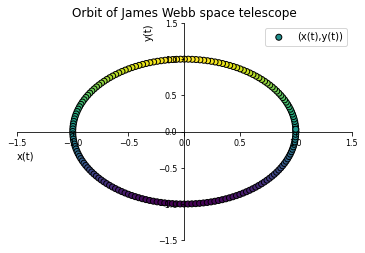

In [14]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.axis([-1.5,1.5,-1.5,1.5])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('y(t)', loc='top')
ax.set_xlabel('x(t)', loc='left')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Orbit of James Webb space telescope')
#plt.grid()
plt.scatter(xv1, yv1,c=cyv1, ec='k', label='(x(t),y(t))')
ax.legend()
# changing the size of figure to 2X2



As we have seen a quantum circuit can simulate the orbit of the James Webb telescope using the implicit Euler method of integration and the HHL algorithm.
In order to do so, we have to consider valid quantum conditions. The matrix imput needs to be Hemitian and recalling that the vector imput is a Quantum state with real numbers it needs to satisfy the following conditions:

1) When a quantum system is measured, the probability of observing one state is the square of its value. The summation of amplitude squares must be 1 for a valid quantum state.

2) The overall probability must be 1 when we observe a quantum system. If we consider a quantum system as a vector, then the length of such vector should be 1.

We see that for some "full naive solution vectors"  and "classical states" we have the same magnitude for their components but they differ by a - sign that comes from a "global phase" on the solution of the HHL algortithm (naive_hhl_solution), but we know that in quantum mechanics two vectors that differ by a global phase factor are considered equivalent. Nevertheless, as the solutions of the HHL algorithm can have a global phase, the new imput vector constructed from the solution will carry this global phase which also affects the new quantum and classical outcomes for the vector $\vec{x}$.

We have plotted all the data for it's trayectory over the period of T=180 days= 6 months (30 days per month) performing a measurment every day. We found that the plotts of the $\vec{x}=(x(t),y(t))$ form a unitary circle, which we can consider as the trayectory of the James Webb telescope.


